In [1]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from keras.callbacks import EarlyStopping
from keras import backend as K
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Dropout
from numpy import dstack
from sklearn.linear_model import LogisticRegression

2022-11-21 16:36:49.109395: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


There are 3 features with string values.

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Dataset is free of null values.

In [6]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Since the number of countries is less and also their is no rank which can be associated with the customers of different region. Hence we use one hot encodding.

In [7]:
#One hot encodding
geo = pd.get_dummies(df['Geography'],drop_first = True)
gen = pd.get_dummies(df['Gender'],drop_first= True)
df = pd.concat([df,gen,geo],axis=1)



In [8]:
#Drop unnecessary data
df.drop(['Geography','Gender','Surname','RowNumber','CustomerId'],axis=1,inplace = True)

In [9]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,1,0


We need to do data normalization before we send the data to train a neural network model.

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
X = df.drop('Exited',axis=1)
y = df['Exited']

In [12]:
#normalization
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
X_scaled

array([[0.538     , 0.32432432, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.516     , 0.31081081, 0.1       , ..., 0.        , 0.        ,
        1.        ],
       [0.304     , 0.32432432, 0.8       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.718     , 0.24324324, 0.7       , ..., 0.        , 0.        ,
        0.        ],
       [0.844     , 0.32432432, 0.3       , ..., 1.        , 1.        ,
        0.        ],
       [0.884     , 0.13513514, 0.4       , ..., 0.        , 0.        ,
        0.        ]])

In [14]:
pd.DataFrame( )

""


In [15]:
X_final = pd.DataFrame(columns = ['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Male','Germany','Spain'],data = X_scaled)

In [16]:
X_final.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,0.0,0.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.0,1.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,0.0,0.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,0.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.0,1.0


In [17]:
#train-test-split
X_train,X_test,y_train,y_test = train_test_split(X_final,y,test_size = 0.30,random_state = 101)

Modeling

Output shape:
  N-D tensor with shape: (batch_size, ..., units).
For instance, for a 2D input with shape (batch_size, input_dim),
the output would have shape (batch_size, units).

In [18]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

We will chose f_score 

In [19]:

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


Lets create 3 neural networks to stack further.

In [20]:
model1 = Sequential()
model1.add(Dense(50,activation = 'relu',input_dim = 11))
model1.add(Dense(25,activation = 'relu'))
model1.add(Dense(1,activation = 'sigmoid'))

2022-11-21 16:36:55.489385: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                600       
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 1,901
Trainable params: 1,901
Non-trainable params: 0
_________________________________________________________________


In [22]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=[f1_m])
history = model1.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 50)

Epoch 1/50
219/219 [==============================] - 2s 3ms/step - loss: 0.4927 - f1_m: 0.0047 - val_loss: 0.4611 - val_f1_m: 0.0168
Epoch 2/50
219/219 [==============================] - 0s 2ms/step - loss: 0.4491 - f1_m: 0.1611 - val_loss: 0.4373 - val_f1_m: 0.2025
Epoch 3/50
219/219 [==============================] - 0s 2ms/step - loss: 0.4318 - f1_m: 0.2661 - val_loss: 0.4191 - val_f1_m: 0.2486
Epoch 4/50
219/219 [==============================] - 0s 2ms/step - loss: 0.4174 - f1_m: 0.3288 - val_loss: 0.4181 - val_f1_m: 0.4623
Epoch 5/50
219/219 [==============================] - 0s 2ms/step - loss: 0.4025 - f1_m: 0.3846 - val_loss: 0.3880 - val_f1_m: 0.4191
Epoch 6/50
219/219 [==============================] - 0s 2ms/step - loss: 0.3855 - f1_m: 0.4196 - val_loss: 0.3719 - val_f1_m: 0.4606
Epoch 7/50
219/219 [==============================] - 0s 2ms/step - loss: 0.3719 - f1_m: 0.4607 - val_loss: 0.3604 - val_f1_m: 0.4529
Epoch 8/50
219/219 [==============================] - 0s 2ms/s

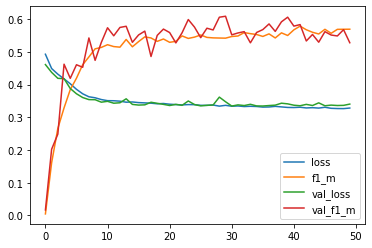

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['f1_m'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_f1_m'])
plt.legend(['loss','f1_m',"val_loss",'val_f1_m'])
plt.show()

Lets save the model.

In [24]:
model1.save('model1.h5')

Train 2 more different models.

In [25]:
model2 = Sequential()
model2.add(Dense(50,activation = 'relu',input_dim = 11))
model2.add(Dense(25,activation = 'relu'))
model2.add(Dense(10,activation = 'relu'))
model2.add(Dense(1,activation = 'sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=[f1_m])
history1 = model2.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 50)

Epoch 1/50
219/219 [==============================] - 1s 2ms/step - loss: 0.4857 - f1_m: 0.0000e+00 - val_loss: 0.4629 - val_f1_m: 0.0000e+00
Epoch 2/50
219/219 [==============================] - 0s 2ms/step - loss: 0.4520 - f1_m: 0.0070 - val_loss: 0.4390 - val_f1_m: 0.0199
Epoch 3/50
219/219 [==============================] - 0s 2ms/step - loss: 0.4324 - f1_m: 0.1337 - val_loss: 0.4219 - val_f1_m: 0.1767
Epoch 4/50
219/219 [==============================] - 0s 2ms/step - loss: 0.4164 - f1_m: 0.2657 - val_loss: 0.4065 - val_f1_m: 0.4314
Epoch 5/50
219/219 [==============================] - 0s 2ms/step - loss: 0.4005 - f1_m: 0.3683 - val_loss: 0.3881 - val_f1_m: 0.4395
Epoch 6/50
219/219 [==============================] - 0s 2ms/step - loss: 0.3830 - f1_m: 0.4404 - val_loss: 0.3697 - val_f1_m: 0.4758
Epoch 7/50
219/219 [==============================] - 0s 2ms/step - loss: 0.3720 - f1_m: 0.4680 - val_loss: 0.3611 - val_f1_m: 0.5044
Epoch 8/50
219/219 [==============================] - 

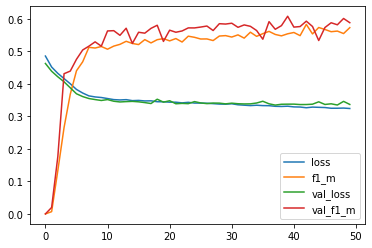

In [26]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['f1_m'])
plt.plot(history1.history['val_loss'])
plt.plot(history1.history['val_f1_m'])
plt.legend(['loss','f1_m',"val_loss",'val_f1_m'])
plt.show()

In [27]:
model2.save('model2.h5')

In [28]:
model3 = Sequential()
model3.add(Dense(50,activation = 'relu',input_dim = 11))
model3.add(Dense(25,activation = 'relu'))
model3.add(Dense(15,activation = 'relu'))
model3.add(Dense(5,activation = 'relu'))
model3.add(Dense(1,activation = 'sigmoid'))

model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=[f1_m])
history3 = model3.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 100)

Epoch 1/100
219/219 [==============================] - 2s 3ms/step - loss: 0.5040 - f1_m: 0.0166 - val_loss: 0.4603 - val_f1_m: 0.0860
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4522 - f1_m: 0.1514 - val_loss: 0.4436 - val_f1_m: 0.2782
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4360 - f1_m: 0.2525 - val_loss: 0.4268 - val_f1_m: 0.2613
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4258 - f1_m: 0.2968 - val_loss: 0.4175 - val_f1_m: 0.2937
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4134 - f1_m: 0.3635 - val_loss: 0.4040 - val_f1_m: 0.3546
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3980 - f1_m: 0.3881 - val_loss: 0.3963 - val_f1_m: 0.5249
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3831 - f1_m: 0.4492 - val_loss: 0.3678 - val_f1_m: 0.5272
Epoch 8/100
219/219 [==============================] - 

219/219 [==============================] - 0s 2ms/step - loss: 0.3104 - f1_m: 0.5917 - val_loss: 0.3481 - val_f1_m: 0.5749
Epoch 62/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3103 - f1_m: 0.5786 - val_loss: 0.3510 - val_f1_m: 0.5394
Epoch 63/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3094 - f1_m: 0.6043 - val_loss: 0.3474 - val_f1_m: 0.6034
Epoch 64/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3112 - f1_m: 0.5907 - val_loss: 0.3434 - val_f1_m: 0.5979
Epoch 65/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3082 - f1_m: 0.5931 - val_loss: 0.3428 - val_f1_m: 0.5631
Epoch 66/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3087 - f1_m: 0.6099 - val_loss: 0.3463 - val_f1_m: 0.6005
Epoch 67/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3071 - f1_m: 0.6012 - val_loss: 0.3474 - val_f1_m: 0.5589
Epoch 68/100
219/219 [==============================] - 0s 2m

In [29]:
model3.save('model3.h5')

In [30]:
model4 = Sequential()
model4.add(Dense(50,activation = 'relu',input_dim = 11))
model4.add(Dense(25,activation = 'relu'))
model4.add(Dense(15,activation = 'relu'))

model4.add(Dense(10,activation = 'relu'))
model4.add(Dense(5,activation = 'relu'))
model4.add(Dense(1,activation = 'sigmoid'))

model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=[f1_m])
history4 = model4.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 100)

Epoch 1/100
219/219 [==============================] - 2s 3ms/step - loss: 0.5402 - f1_m: 0.0153 - val_loss: 0.4673 - val_f1_m: 0.0000e+00
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4557 - f1_m: 0.0282 - val_loss: 0.4441 - val_f1_m: 0.1541
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4386 - f1_m: 0.2743 - val_loss: 0.4257 - val_f1_m: 0.2552
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4205 - f1_m: 0.3452 - val_loss: 0.4005 - val_f1_m: 0.4657
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4003 - f1_m: 0.4167 - val_loss: 0.3795 - val_f1_m: 0.5067
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3807 - f1_m: 0.4622 - val_loss: 0.3552 - val_f1_m: 0.5569
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3650 - f1_m: 0.5094 - val_loss: 0.3503 - val_f1_m: 0.5133
Epoch 8/100
219/219 [==============================

219/219 [==============================] - 0s 2ms/step - loss: 0.3086 - f1_m: 0.5873 - val_loss: 0.3431 - val_f1_m: 0.5814
Epoch 62/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3048 - f1_m: 0.6134 - val_loss: 0.3443 - val_f1_m: 0.5651
Epoch 63/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3048 - f1_m: 0.5957 - val_loss: 0.3429 - val_f1_m: 0.5852
Epoch 64/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3044 - f1_m: 0.6001 - val_loss: 0.3489 - val_f1_m: 0.5802
Epoch 65/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3037 - f1_m: 0.6140 - val_loss: 0.3472 - val_f1_m: 0.5900
Epoch 66/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3058 - f1_m: 0.6063 - val_loss: 0.3601 - val_f1_m: 0.6151
Epoch 67/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3037 - f1_m: 0.6012 - val_loss: 0.3484 - val_f1_m: 0.5580
Epoch 68/100
219/219 [==============================] - 0s 2m

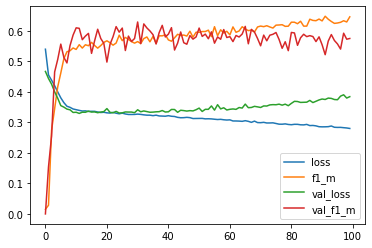

In [31]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['f1_m'])
plt.plot(history4.history['val_loss'])
plt.plot(history4.history['val_f1_m'])
plt.legend(['loss','f1_m',"val_loss",'val_f1_m'])
plt.show()

In [32]:
model4.save('model4.h5')

In [33]:
dependencies = {
    'f1_m': f1_m
}


In [34]:
# load models from file
def load_all_models(n_models):
	all_models = list()
	for i in range(n_models):
		# define filename for this ensemble
		filename = 'model' + str(i + 1) + '.h5'
		# load model from file
		model = load_model(filename,custom_objects=dependencies)
		# add to list of members
		all_models.append(model)
		print('>loaded %s' % filename)
	return all_models

In [35]:
n_members = 4
members = load_all_models(n_members)
print('Loaded %d models' % len(members))

>loaded model1.h5
>loaded model2.h5
>loaded model3.h5
>loaded model4.h5
Loaded 4 models


In [36]:

# create stacked model input dataset as outputs from the ensemble
def stacked_dataset(members, inputX):
	stackX = None
	for model in members:
		# make prediction
		yhat = model.predict(inputX, verbose=0)
		# stack predictions into [rows, members, probabilities]
		if stackX is None:
			stackX = yhat #
		else:
			stackX = dstack((stackX, yhat))
	# flatten predictions to [rows, members x probabilities]
	stackX = stackX.reshape((stackX.shape[0], stackX.shape[1]*stackX.shape[2]))
	return stackX

In [37]:

# fit a model based on the outputs from the ensemble members
def fit_stacked_model(members, inputX, inputy):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	# fit standalone model
	model = LogisticRegression() #meta learner
	model.fit(stackedX, inputy)
	return model

In [38]:
model = fit_stacked_model(members, X_test,y_test)

In [39]:

# make a prediction with the stacked model
def stacked_prediction(members, model, inputX):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX )
	# make a prediction
	yhat = model.predict(stackedX)
	return yhat

In [40]:

# evaluate model on test set
yhat = stacked_prediction(members, model, X_test)
score = f1_m(y_test/1.0, yhat/1.0)
print('Stacked F Score:', score)

Stacked F Score: tf.Tensor(0.6060018880771932, shape=(), dtype=float64)


from sklearn.metrics import f1_score

In [42]:
i = 0
for model in members:
    i+=1
    pred = (model.predict(X_test) > 0.5).astype("int32")
    score = f1_score(y_test,pred)
    print('F-Score of model {} is '.format(i),score)

94/94 [==============================] - 0s 852us/step
F-Score of model 1 is  0.5527950310559006
94/94 [==============================] - 0s 855us/step
F-Score of model 2 is  0.6032350142721218
94/94 [==============================] - 0s 852us/step
F-Score of model 3 is  0.5643070787637089
94/94 [==============================] - 0s 841us/step
F-Score of model 4 is  0.6001796945193171


# Stacked Model give f1 score of 0.6035 which is higher than any other model taken alone.

notebook credits https://www.analyticsvidhya.com/blog/2021/08/ensemble-stacking-for-machine-learning-and-deep-learning/
        